In [12]:
import pandas as pd
import seaborn as sb
from tqdm import tqdm
import util as u
import matplotlib.pyplot as plt
import entropy_estimators as ee
# plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
def weighted_generror(gen, test_score):
    return (gen ** 2) / (1 - test_score)

In [4]:
df = pd.read_pickle('data/completed-w-holes-7-26-2018.pkl')
df['acc_generror'] = df['avg_train_accuracy'] - df['avg_test_accuracy']
df['bal_acc_generror'] = df['avg_train_bal_accuracy'] - df['avg_test_bal_accuracy']
df['f1_generror'] = df['avg_train_f1_macro'] - df['avg_test_f1_macro']
df['bal_acc_weighted_generror'] = weighted_generror(df['bal_acc_generror'], df['avg_test_bal_accuracy'])
df

,dataset,classifier,parameters,avg_fit_time,avg_score_time,avg_test_accuracy,avg_test_bal_accuracy,avg_test_f1_macro,avg_train_accuracy,avg_train_bal_accuracy,...,std_test_accuracy,std_test_bal_accuracy,std_test_f1_macro,std_train_accuracy,std_train_bal_accuracy,std_train_f1_macro,acc_generror,bal_acc_generror,f1_generror,bal_acc_weighted_generror
0,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,XGBClassifier,"gamma=0.4,learning_rate=1.0,max_depth=0,n_esti...",0.252560,0.009022,0.500000,0.500000,0.333333,0.500000,0.500000,...,0.000000,0.000000,5.551115e-17,0.000000,0.000000,5.551115e-17,0.000000,0.000000,0.000000,0.000000e+00
1,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,XGBClassifier,"gamma=0.30000000000000004,learning_rate=1.0,ma...",0.182943,0.008816,0.500000,0.500000,0.333333,0.500000,0.500000,...,0.000000,0.000000,5.551115e-17,0.000000,0.000000,5.551115e-17,0.000000,0.000000,0.000000,0.000000e+00
2,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,ExtraTreesClassifier,"criterion=gini,max_features=0.25,min_impurity_...",0.376539,0.009392,0.502500,0.502500,0.501648,1.000000,1.000000,...,0.030000,0.030000,3.035282e-02,0.000000,0.000000,0.000000e+00,0.497500,0.497500,0.498352,4.975000e-01
3,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,GradientBoostingClassifier,"learning_rate=100.0,loss=deviance,max_features...",0.127104,0.006749,0.498125,0.498125,0.363835,0.505347,0.505347,...,0.006875,0.006875,5.028716e-02,0.014477,0.014477,6.878735e-02,0.007222,0.007222,0.008727,1.039312e-04
4,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,GradientBoostingClassifier,"learning_rate=100.0,loss=exponential,max_featu...",0.160812,0.007107,0.502500,0.502500,0.425056,0.497778,0.497778,...,0.021687,0.021687,5.096333e-02,0.018217,0.018217,3.680079e-02,-0.004722,-0.004722,-0.005977,4.482288e-05
5,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,GradientBoostingClassifier,"learning_rate=50.0,loss=exponential,max_featur...",0.160917,0.007367,0.503750,0.503750,0.421118,0.499653,0.499653,...,0.022396,0.022396,5.236722e-02,0.018274,0.018274,3.840542e-02,-0.004097,-0.004097,-0.001942,3.382817e-05
6,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,GradientBoostingClassifier,"learning_rate=100.0,loss=exponential,max_featu...",0.508658,0.007370,0.505625,0.505625,0.422873,0.503750,0.503750,...,0.032046,0.032046,8.822452e-02,0.009738,0.009738,7.750550e-02,-0.001875,-0.001875,-0.001092,7.111252e-06
7,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,SGDClassifier,"alpha=0.001,eta0=1.0,fit_intercept=True,l1_rat...",0.151347,0.023158,0.500000,0.500000,0.333333,0.500000,0.500000,...,0.000000,0.000000,5.551115e-17,0.000000,0.000000,5.551115e-17,0.000000,0.000000,0.000000,0.000000e+00
8,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,XGBClassifier,"gamma=0.30000000000000004,learning_rate=10.0,m...",1.880818,0.010538,0.500000,0.500000,0.333333,0.500000,0.500000,...,0.000000,0.000000,5.551115e-17,0.000000,0.000000,5.551115e-17,0.000000,0.000000,0.000000,0.000000e+00
9,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...,GradientBoostingClassifier,"learning_rate=0.5,loss=exponential,max_feature...",3.625288,0.011119,0.491250,0.491250,0.489779,1.000000,1.000000,...,0.022220,0.022220,2.241324e-02,0.000000,0.000000,0.000000e+00,0.508750,0.508750,0.510221,5.087500e-01


In [4]:
print('\n'.join(df.columns))

dataset
classifier
parameters
avg_fit_time
avg_score_time
avg_test_accuracy
avg_test_bal_accuracy
avg_test_f1_macro
avg_train_accuracy
avg_train_bal_accuracy
avg_train_f1_macro
std_fit_time
std_score_time
std_test_accuracy
std_test_bal_accuracy
std_test_f1_macro
std_train_accuracy
std_train_bal_accuracy
std_train_f1_macro
acc_generror
bal_acc_generror
f1_generror
bal_acc_weighted_generror


In [ ]:
df.groupby(['dataset', 'classifier', 'parameters'])['avg_fit_time'].mean().reset_index()

In [ ]:
# number of evalutations each method had
data = df.groupby(['dataset', 'classifier', 'parameters'])['avg_fit_time'].mean().reset_index()
data.groupby('classifier')['parameters'].count()
del data

In [ ]:
columns = ['bal_acc_generror', 'avg_test_bal_accuracy'] # ['acc_generror', 'bal_acc_generror', 'f1_generror']
generror_table = df.groupby('dataset')[columns].mean()

generror_table['bal_acc_balgenerror'] = f(generror_table['bal_acc_generror'], generror_table['avg_test_bal_accuracy'])
generror_table.sort_values('bal_acc_balgenerror')

<IPython.core.display.Javascript object>


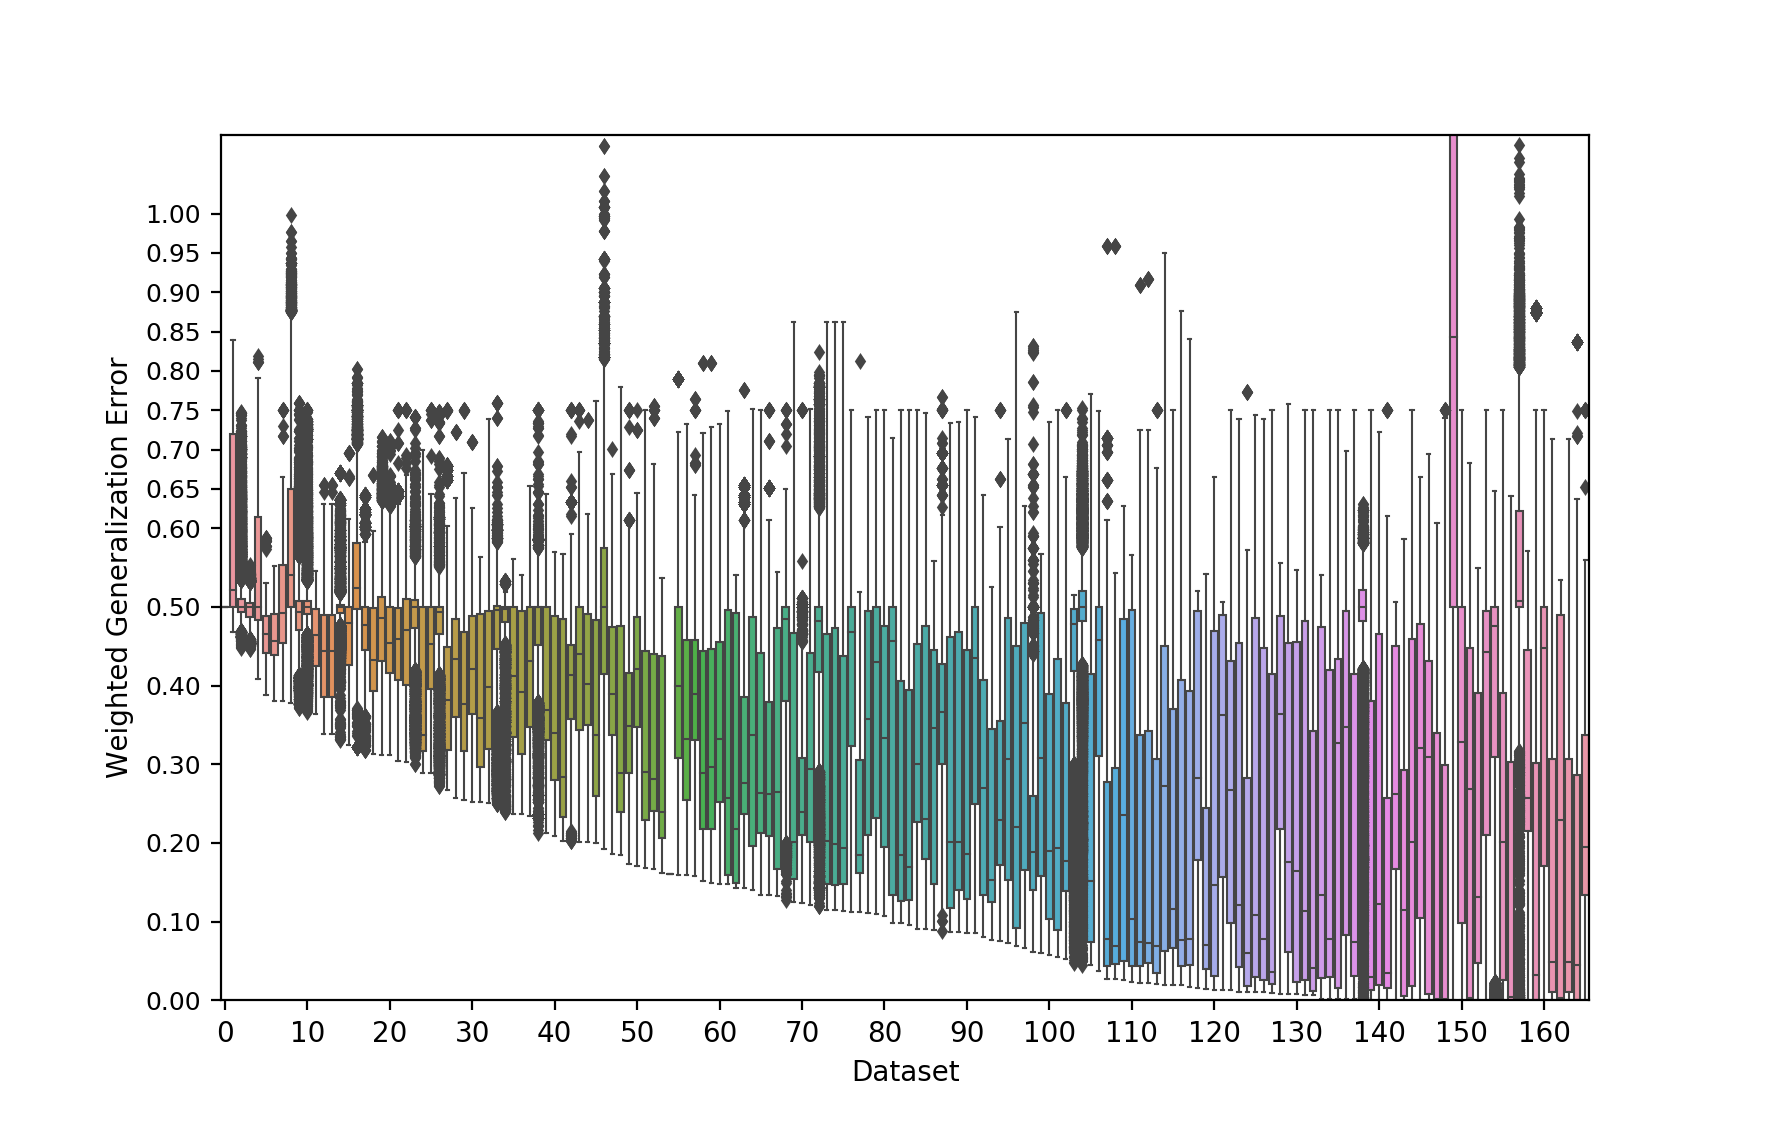

Text(0.5,0,'Dataset')

In [122]:
%matplotlib notebook
metric = 'bal_acc_weighted_generror'
order = df.groupby('dataset').min().sort_values(metric, ascending=False).index
s = sb.boxplot(data=df, x='dataset', y=metric, order=order, fliersize=3,linewidth=0.75)
s.set_xticks(np.arange(len(np.unique(df['dataset'])),step=10))
s.set_xticklabels(np.arange(len(np.unique(df['dataset'])),step=10))
yticks = np.hstack((np.arange(0.6,step=0.1),np.arange(0.6,1.05,step=0.05)))
s.set_yticks(yticks)
s.set_yticklabels(['{0:.2f}'.format(x) for x in yticks],size=9)
plt.ylim(0,1.1)
plt.ylabel('Weighted Generalization Error',size=10)
plt.xlabel('Dataset',size=10)


<IPython.core.display.Javascript object>


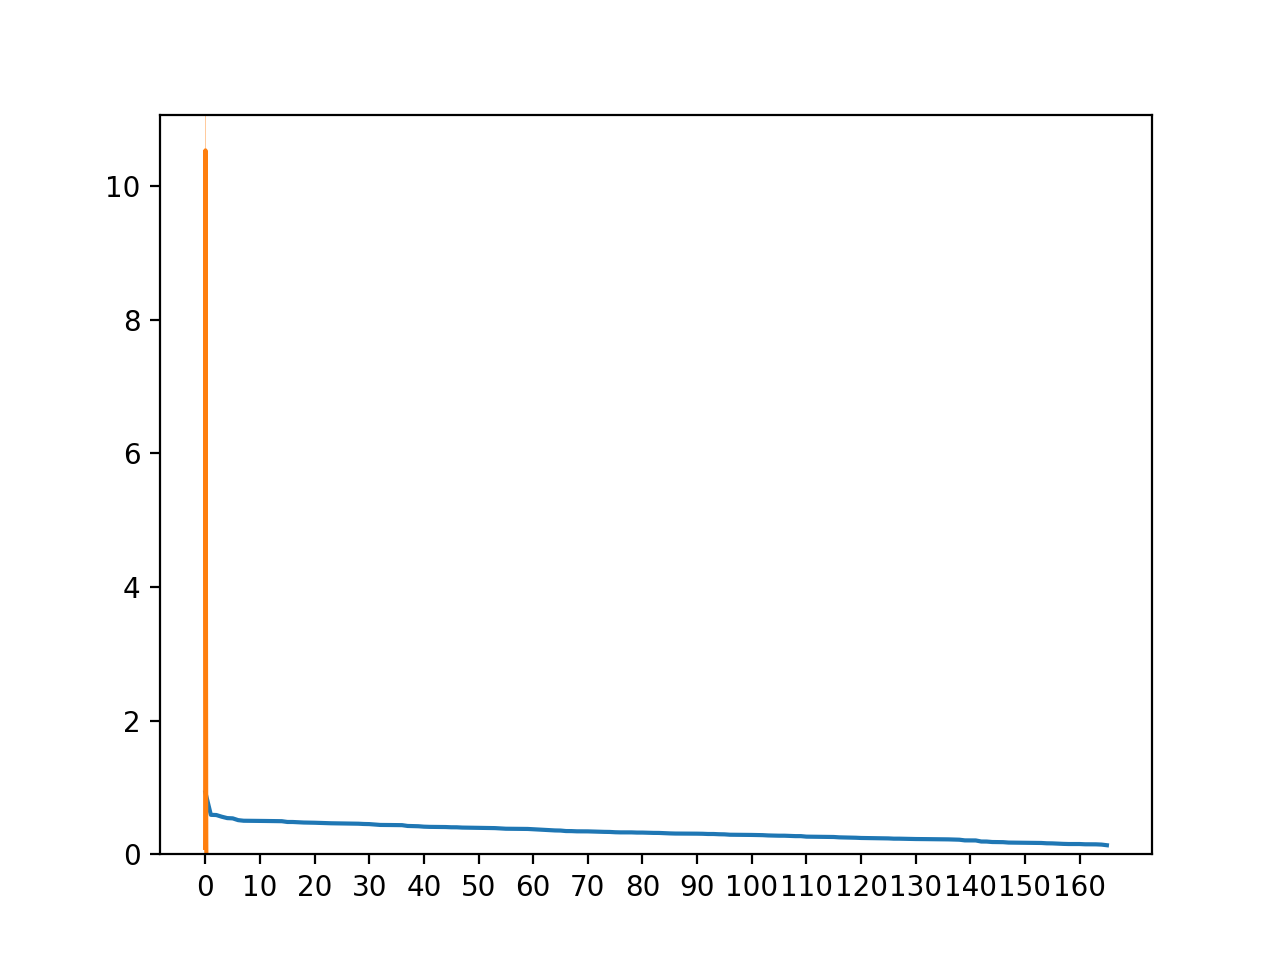

(0, 1)

In [127]:
%matplotlib notebook
# across datasets, mean weighted generalization error
metric = 'bal_acc_weighted_generror'
plt.plot(df.groupby('dataset').mean().sort_values(metric, ascending=False)[metric])
plt.xticks(np.arange(len(np.unique(df['dataset'])),step=10), np.arange(len(np.unique(df['dataset'])),step=10))
plt.ylim([0, 1])

<IPython.core.display.Javascript object>


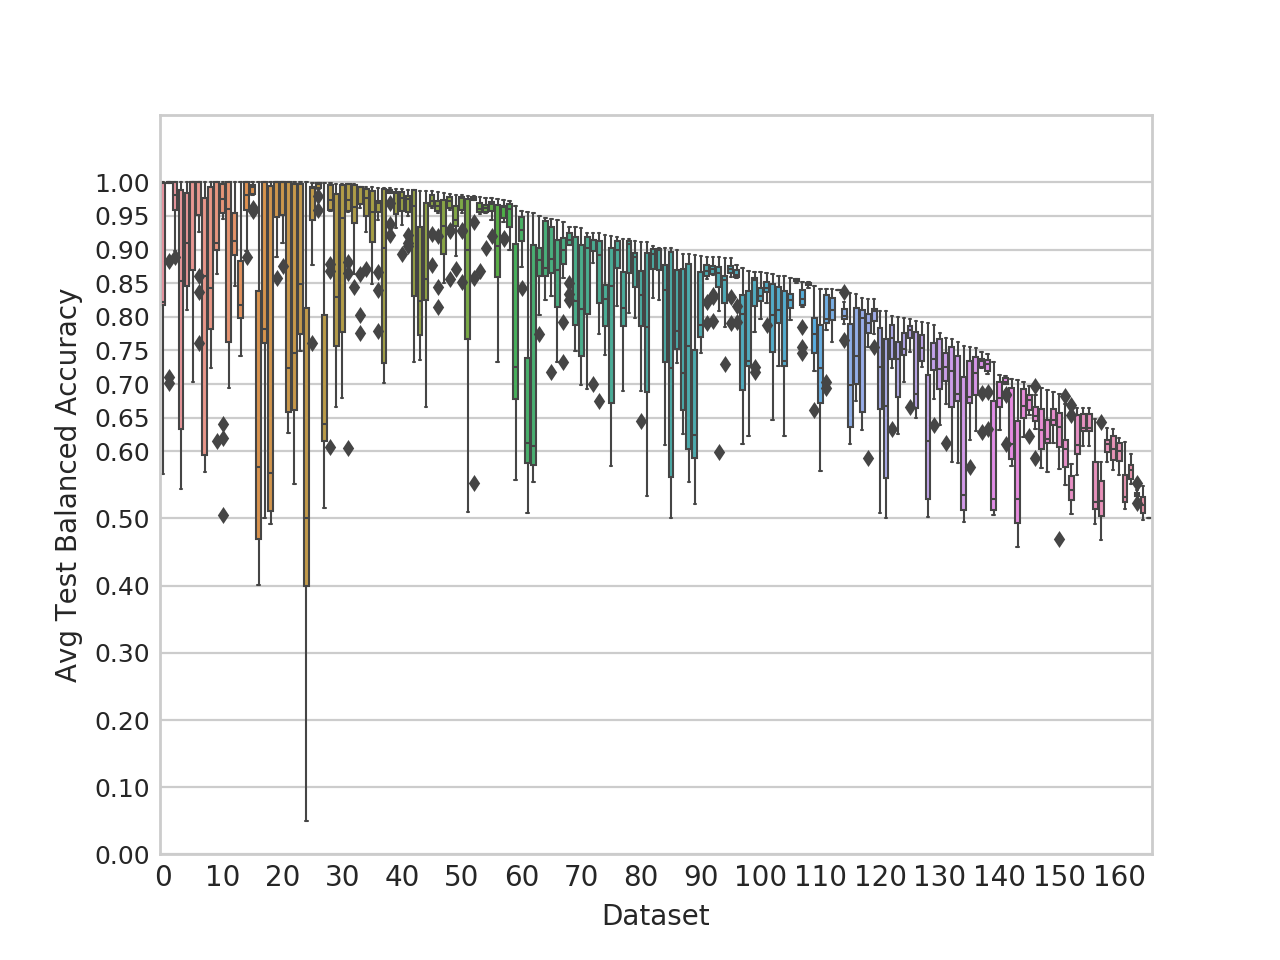

In [13]:
%matplotlib notebook
metric = 'avg_test_bal_accuracy'
data = df.groupby(['dataset','classifier'])[metric].max().reset_index()
order = data.groupby('dataset').max().sort_values(metric, ascending=False).index
sb.set_style("whitegrid")
s = sb.boxplot(data=data, x='dataset', y=metric, order=order, fliersize=3,linewidth=0.75)
s.set_xticks(np.arange(len(np.unique(data['dataset'])),step=10))
s.set_xticklabels(np.arange(len(np.unique(data['dataset'])),step=10))
yticks = np.hstack((np.arange(0.6,step=0.1),np.arange(0.6,1.05,step=0.05)))
s.set_yticks(yticks)
s.set_yticklabels(['{0:.2f}'.format(x) for x in yticks],size=9)
plt.ylim(0,1.1)
plt.ylabel('Avg Test Balanced Accuracy',size=10)
plt.xlabel('Dataset',size=10)
plt.savefig('sorted-by-max-bal-accuracy.png', dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


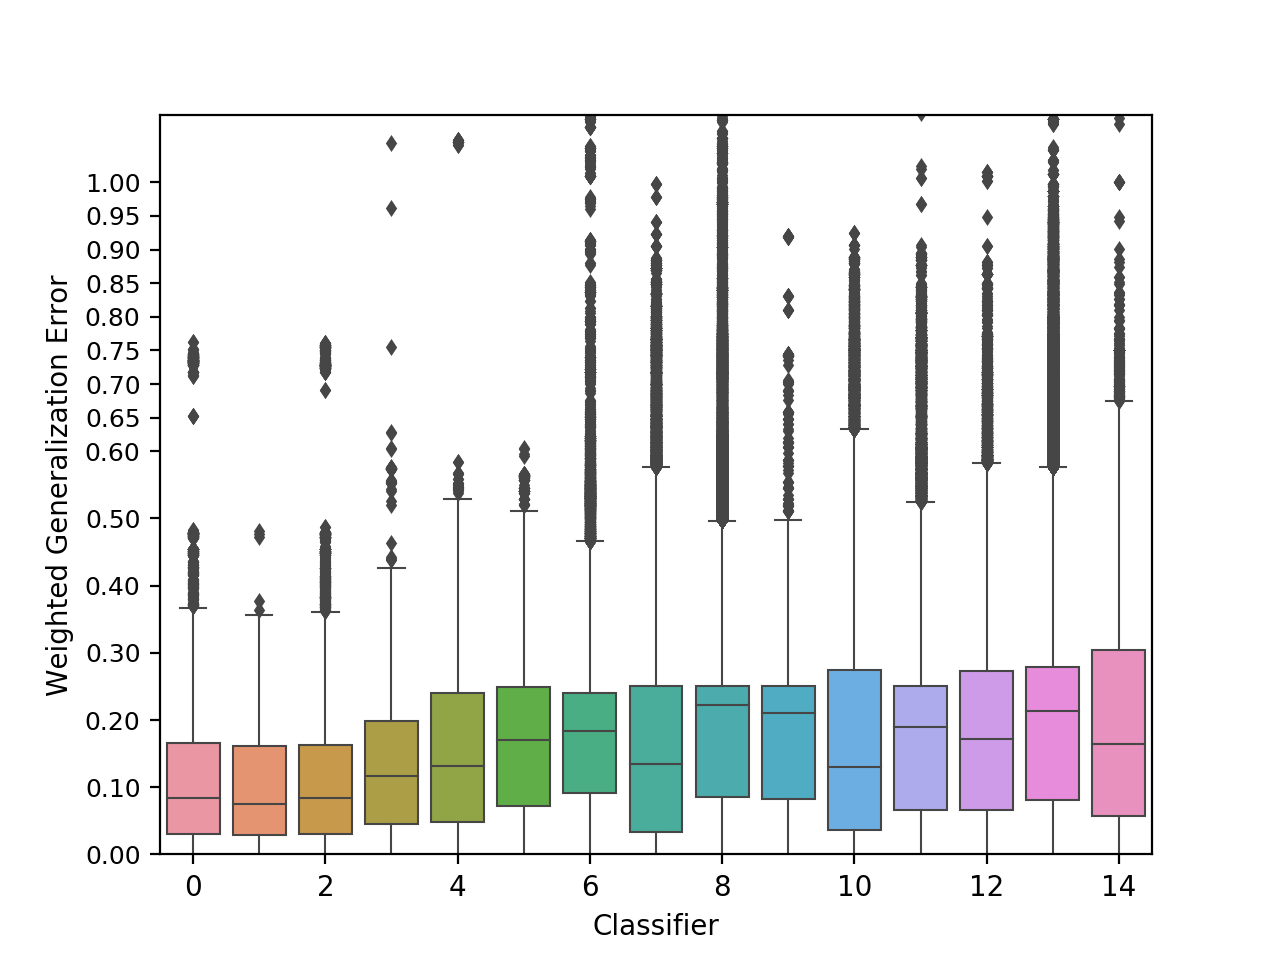

Text(0.5,0,'Classifier')

In [18]:
%matplotlib notebook
metric = 'bal_acc_weighted_generror'
order = df.groupby('classifier').mean().sort_values(metric, ascending=True).index
s = sb.boxplot(data=df, x='classifier', y=metric, order=order, fliersize=3,linewidth=0.75)
s.set_xticks(np.arange(len(np.unique(df['classifier'])),step=2))
s.set_xticklabels(np.arange(len(np.unique(df['classifier'])),step=2))
yticks = np.hstack((np.arange(0.6,step=0.1),np.arange(0.6,1.05,step=0.05)))
s.set_yticks(yticks)
s.set_yticklabels(['{0:.2f}'.format(x) for x in yticks],size=9)
plt.ylim(0,1.1)
plt.ylabel('Weighted Generalization Error',size=10)
plt.xlabel('Classifier',size=10)

In [14]:
total = {}
for dataset, group_dataset in tqdm(df.groupby('dataset')):
    l = len(group_dataset['avg_test_bal_accuracy'].unique())
    accuracy_ranks = {}
    for rank, bal_accuracy in enumerate(sorted(group_dataset['avg_test_bal_accuracy'].unique(), reverse=True)):
        accuracy_ranks[bal_accuracy] = (rank + 1)
    total[dataset] = accuracy_ranks
pd.DataFrame(total)


100%|██████████| 166/166 [00:02<00:00, 59.81it/s]


,GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_EDM-1_1,GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1,GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1,GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_50_EDM-2_001,GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_75_EDM-2_001,Hill_Valley_with_noise,Hill_Valley_without_noise,adult,agaricus-lepiota,...,vote,vowel,waveform-21,waveform-40,wdbc,wine-quality-red,wine-quality-white,wine-recognition,xd6,yeast
0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.025000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.041029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.041314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2896.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.050046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.053820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.053959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.054353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.054355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# How does Weighted generatlization error change across parameter settings

In [5]:
parameter_table = {}
for classifier, c_group in tqdm(df.groupby('classifier')):
    res = {}
    for pDict in (c_group['parameters'].apply(reload(u).stringToDict)):
        for key, item in pDict.items():
            if key not in res:
                res[key] = []
            res[key].append(item)
    for key, item in res.items():
        c_group[key] = item
    parameter_table[classifier] = c_group.reset_index()

  0%|          | 0/15 [00:00<?, ?it/s]/usr/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 15/15 [00:43<00:00,  2.87s/it]


In [16]:
for parameters, p_group in parameter_table['AdaBoostClassifier'].groupby('parameters'):
    t = p_group['bal_acc_weighted_generror']
    print(parameters, t.mean(), t.std())

learning_rate=0.01,n_estimators=10,random_state=324089 0.004811602060432169 0.022262784600887982
learning_rate=0.01,n_estimators=100,random_state=324089 0.006938653917025736 0.025299251151247502
learning_rate=0.01,n_estimators=50,random_state=324089 0.005521952642392628 0.023349065353664624
learning_rate=0.01,n_estimators=500,random_state=324089 0.013391600725345813 0.03332375276221882
learning_rate=0.1,n_estimators=10,random_state=324089 0.006874631768335168 0.0244966879420024
learning_rate=0.1,n_estimators=100,random_state=324089 0.018597404068800987 0.04140097241954115
learning_rate=0.1,n_estimators=50,random_state=324089 0.01384182779886093 0.03614503053683104
learning_rate=0.1,n_estimators=500,random_state=324089 0.03475928196323256 0.06521820429436304
learning_rate=0.5,n_estimators=10,random_state=324089 0.01315881270107801 0.03544616648766106
learning_rate=0.5,n_estimators=100,random_state=324089 0.0368832128255916 0.06839773246105882
learning_rate=0.5,n_estimators=50,random_sta

<IPython.core.display.Javascript object>


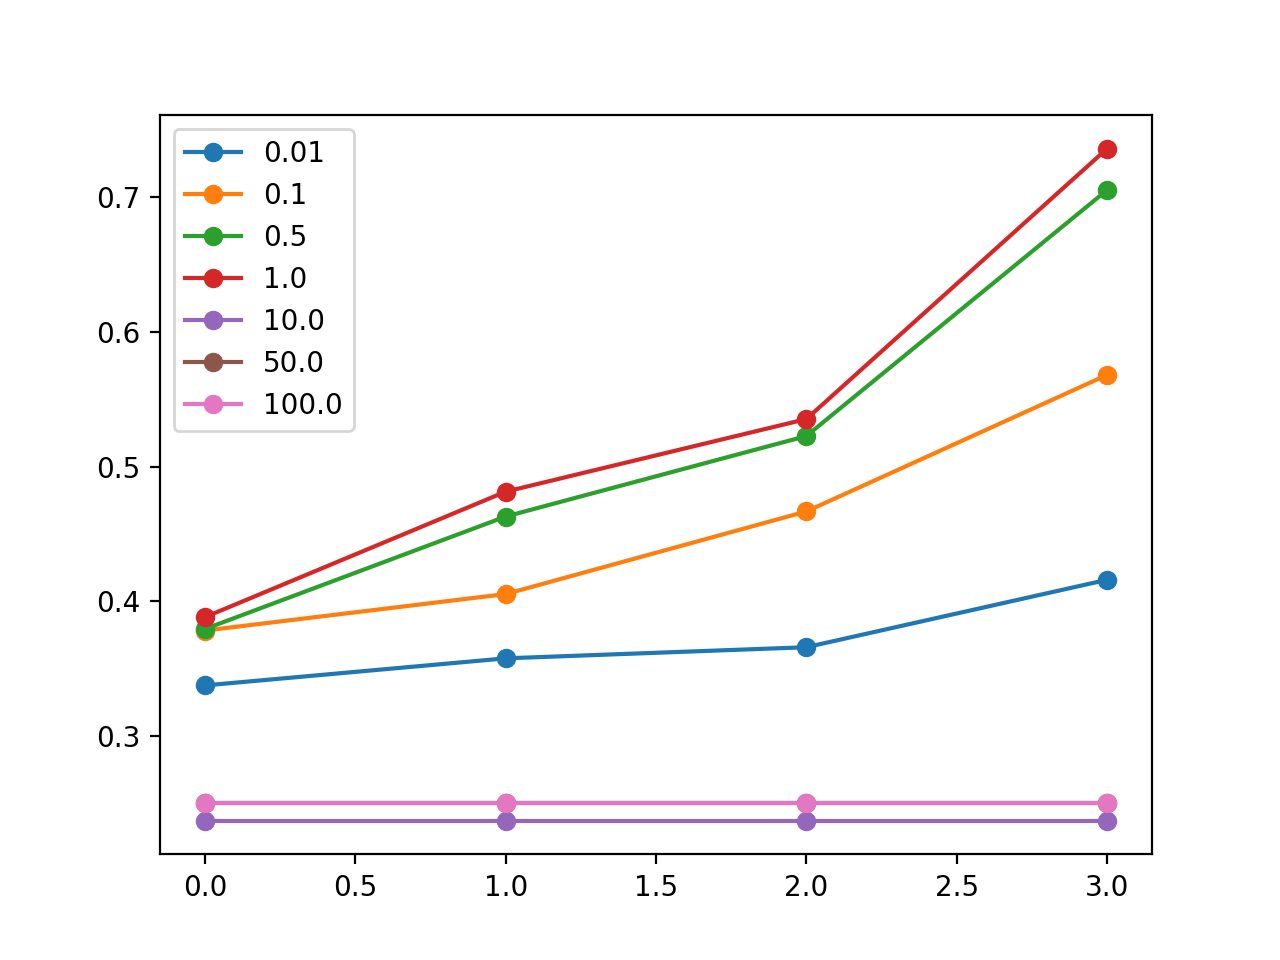

In [80]:
%matplotlib notebook
for dataset, group in parameter_table['AdaBoostClassifier'].groupby('dataset'):
    for lr, sub in group.groupby('learning_rate'):
        # print(lr, sub.sort_values('n_estimators')['bal_acc_weighted_generror'].reset_index(drop=True))
        plt.plot(sub.sort_values('n_estimators')['bal_acc_weighted_generror'].reset_index(drop=True), marker='o', label=str(lr))
    plt.legend()
    break

In [6]:
ada = parameter_table['AdaBoostClassifier']

In [111]:
for dataset in tqdm(ada['dataset'].unique()):
    tmp = ada[ada['dataset'] == dataset]
    sb.heatmap(tmp.pivot('learning_rate', 'n_estimators', 'avg_test_bal_accuracy'), cmap='gray')
    plt.savefig("{}.png".format(dataset), dpi=400)
    plt.clf()



  0%|          | 0/164 [00:00<?, ?it/s]

  1%|          | 1/164 [00:00<02:27,  1.11it/s]

  1%|          | 2/164 [00:01<02:28,  1.09it/s]

  2%|▏         | 3/164 [00:02<02:24,  1.11it/s]

  2%|▏         | 4/164 [00:03<02:24,  1.11it/s]

  3%|▎         | 5/164 [00:04<02:23,  1.11it/s]

  4%|▎         | 6/164 [00:05<02:23,  1.10it/s]

  4%|▍         | 7/164 [00:06<02:23,  1.10it/s]

  5%|▍         | 8/164 [00:07<02:22,  1.10it/s]

  5%|▌         | 9/164 [00:08<02:22,  1.09it/s]

  6%|▌         | 10/164 [00:09<02:23,  1.08it/s]

  7%|▋         | 11/164 [00:10<02:23,  1.06it/s]

  7%|▋         | 12/164 [00:11<02:22,  1.07it/s]

  8%|▊         | 13/164 [00:12<02:21,  1.06it/s]

  9%|▊         | 14/164 [00:13<02:20,  1.07it/s]

  9%|▉         | 15/164 [00:13<02:18,  1.07it/s]

 10%|▉         | 16/164 [00:14<02:16,  1.08it/s]

 10%|█         | 17/164 [00:15<02:15,  1.09it/s]

 11%|█         | 18/164 [00:16<02:14,  1.09it/s]

 12%|█▏        | 19/164 [00:17<02:13,  1.09it/s]

 12%|█▏        |

## Best parameter setting per classifier

In [7]:
# metric = 'bal_acc_weighted_generror'
metric = 'avg_test_bal_accuracy'
frequency = {}
for classifier, classifier_table in tqdm(parameter_table.items()):
    acc = {}
    for dataset, table in classifier_table.groupby('dataset'):
        acc[dataset] = table.sort_values(metric).reset_index(drop=True).loc[0, 'parameters']
    frequency[classifier] = map_dict(lambda v: v/len(acc), reload(u).frequency(list(acc.values())))

100%|██████████| 15/15 [00:06<00:00,  2.45it/s]


In [218]:
for classifier, freq_table in frequency.items():
    print(classifier)
    print("\tParams : {}".format(", ".join(reload(u).stringToDict(list(freq_table.items())[0][0]).keys())))
    print("\n".join(map(lambda t: "\t{:.2%} : {}".format(t[1], list(reload(u).stringToDict(t[0]).values())), freq_table.items())))

AdaBoostClassifier
	Params : learning_rate, n_estimators, random_state
	12.20% : [10.0, 10.0, 324089.0]
	11.59% : [10.0, 100.0, 324089.0]
	8.54% : [50.0, 100.0, 324089.0]
	8.54% : [10.0, 50.0, 324089.0]
	8.54% : [50.0, 10.0, 324089.0]
	7.32% : [10.0, 500.0, 324089.0]
	7.32% : [100.0, 500.0, 324089.0]
	6.10% : [100.0, 10.0, 324089.0]
	4.88% : [50.0, 500.0, 324089.0]
	4.88% : [100.0, 50.0, 324089.0]
	4.27% : [100.0, 100.0, 324089.0]
	3.66% : [50.0, 50.0, 324089.0]
	2.44% : [0.01, 10.0, 324089.0]
	1.83% : [0.5, 500.0, 324089.0]
	1.83% : [0.01, 100.0, 324089.0]
	1.22% : [0.1, 500.0, 324089.0]
	0.61% : [1.0, 50.0, 324089.0]
	0.61% : [0.01, 500.0, 324089.0]
	0.61% : [0.5, 10.0, 324089.0]
	0.61% : [1.0, 500.0, 324089.0]
	0.61% : [0.1, 50.0, 324089.0]
	0.61% : [0.1, 10.0, 324089.0]
	0.61% : [0.01, 50.0, 324089.0]
	0.61% : [1.0, 100.0, 324089.0]
BernoulliNB
	Params : alpha, binarize, fit_prior
	5.49% : [25.0, 1.0, True]
	4.88% : [0.25, 1.0, False]
	4.88% : [5.0, 1.0, True]
	4.88% : [50.0, 1.0, 

	9.82% : [0.5, False, True, 'l1', 324089.0]
	8.59% : [0.5, True, False, 'l2', 324089.0]
	7.98% : [0.5, False, False, 'l2', 324089.0]
	7.36% : [0.5, False, False, 'l1', 324089.0]
	6.13% : [0.5, False, True, 'l2', 324089.0]
	4.91% : [20.0, True, False, 'l2', 324089.0]
	3.68% : [0.5, True, True, 'l2', 324089.0]
	2.45% : [1.0, False, True, 'l1', 324089.0]
	2.45% : [18.5, True, False, 'l2', 324089.0]
	2.45% : [18.0, True, False, 'l2', 324089.0]
	2.45% : [17.0, True, False, 'l2', 324089.0]
	1.84% : [19.5, True, False, 'l2', 324089.0]
	1.84% : [20.0, True, True, 'l2', 324089.0]
	1.23% : [19.5, True, True, 'l2', 324089.0]
	1.23% : [11.0, True, False, 'l2', 324089.0]
	1.23% : [1.0, False, False, 'l2', 324089.0]
	1.23% : [19.0, True, False, 'l2', 324089.0]
	1.23% : [16.5, True, True, 'l2', 324089.0]
	1.23% : [1.0, True, True, 'l2', 324089.0]
	1.23% : [13.5, True, False, 'l2', 324089.0]
	1.23% : [20.0, False, False, 'l1', 324089.0]
	0.61% : [9.5, True, True, 'l2', 324089.0]
	0.61% : [17.5, True, 

	1.21% : [0.2, 10.0, 1.0, 10.0, 1.0, 324089.0, 0.8]
	1.21% : [0.5, 10.0, 2.0, 100.0, 1.0, 324089.0, 1.0]
	1.21% : [0.5, 100.0, 0.0, 50.0, 1.0, 324089.0, 0.0]
	1.21% : [0.0, 100.0, 10.0, 10.0, 1.0, 324089.0, 1.0]
	1.21% : [0.30000000000000004, 100.0, 10.0, 10.0, 1.0, 324089.0, 0.2]
	1.21% : [0.30000000000000004, 100.0, 5.0, 50.0, 1.0, 324089.0, 1.0]
	1.21% : [0.30000000000000004, 10.0, 4.0, 10.0, 1.0, 324089.0, 1.0]
	1.21% : [0.0, 10.0, 1.0, 50.0, 1.0, 324089.0, 0.8]
	1.21% : [0.1, 10.0, 1.0, 100.0, 1.0, 324089.0, 0.8]
	1.21% : [0.4, 10.0, 1.0, 50.0, 1.0, 324089.0, 0.4]
	1.21% : [0.4, 10.0, 1.0, 50.0, 1.0, 324089.0, 1.0]
	1.21% : [0.4, 10.0, 1.0, 500.0, 1.0, 324089.0, 0.8]
	0.61% : [0.5, 1.0, 1.0, 100.0, 1.0, 324089.0, 1.0]
	0.61% : [0.30000000000000004, 1.0, 1.0, 50.0, 1.0, 324089.0, 0.4]
	0.61% : [0.5, 1.0, 1.0, 500.0, 1.0, 324089.0, 0.4]
	0.61% : [0.30000000000000004, 1.0, 2.0, 100.0, 1.0, 324089.0, 0.4]
	0.61% : [0.0, 1.0, 1.0, 100.0, 1.0, 324089.0, 0.6000000000000001]
	0.61% : [0.5

In [310]:
# How often is classifier[p=x] the best parameter setting
c = 'AdaBoostClassifier'
parameter_table[c]['learning_rate']
acc = 0
for p, avg in total['AdaBoostClassifier'].items():
    if reload(u).stringToDict(p)['learning_rate'] == 10.0:
        acc += avg
print(acc)

# metric = 'avg_test_bal_accuracy'
# total = {}
# for classifier, classifier_table in tqdm(parameter_table.items()):
#     acc = {}
#     for dataset, table in classifier_table.groupby(['dataset', 'learning_rate']):
#         display(table)
#         acc[dataset] = table.sort_values(metric).reset_index(drop=True).loc[0, 'parameters']
#         break
#     total[classifier] = map_dict(lambda v: v/len(acc), reload(u).frequency(list(acc.values())))
#     break

0.39634146341463417


In [106]:
# %matplotlib notebook
metric = 'avg_test_bal_accuracy'
# for i in tqdm(np.arange(0., 0.5, 0.01)):
copy = ada.copy()
vs = []
reload(ee)
for d, group in tqdm(copy.groupby('dataset')):
    group_max = group[metric].max()
    def f(x):
        return x
        # if x == group[metric].max():
        #     return 1
        # else:
        #     return 0

    # vs.append(list(group[metric].apply(f)))
    try:
        matrix = group[metric].apply(f)
        print(d)
        # print(matrix)
        print(ee.kldiv(matrix.values.reshape(28, 1), np.ones((28, 1)) * 0.5))
        print()
        # print(ee.entropy(matrix) / ee.entropy(np.ones((7, 4))))
        # sb.heatmap(group[metric].apply(f).values.reshape(7, 4), vmax=1, vmin=0)
        # plt.suptitle("{:.2f}".format(ee.entropy(matrix)))
        # plt.savefig('{}.png'.format(d), dpi=400)
        # plt.clf()
    except ValueError:
        # print('{} broke!'.format(d))
        pass
    # print(d)
    # display(group[metric].apply(f).values.reshape(7, 4))
    # display(group.pivot('learning_rate', 'n_estimators', metric))
# copy['indicator'] = flatten(vs)
# sb.heatmap(copy.groupby(['learning_rate', 'n_estimators']).mean()['indicator'].values.reshape(7, 4), vmin=0, annot=True)
# plt.savefig('{}.png'.format(0.0), dpi=400)
# plt.clf()

 20%|█▉        | 32/164 [00:00<00:00, 155.51it/s]

GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_EDM-1_1
0.5728519107551929

GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1
7.905626100310649

GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1
1.5352730486675013

GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1
-0.2527036529246717

GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_50_EDM-2_001
-0.5420158955718519

GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_75_EDM-2_001
6.871003198823162

Hill_Valley_with_noise
1.696612937935919

Hill_Valley_without_noise
-1.5929143788496458

adult
1.739781739712289

agaricus-lepiota
0.8058549222631066

allbp
0.22638067911202228

allhyper
0.3365884512291013

allhypo
2.407582082868767

allrep
-0.1359244194336914

analcatdata_aids
1.5207710110500594

analcatdata_asbestos
2.410322833672052

analcatdata_authorship
2.199412453802984

analcatdata_bankruptcy
1.297631806866522

analcatdata_boxing1
1.8451429688199361

analcatdata_boxing2
1.2275868640407952

analcatdata_creditscore
-3.4194034786846608

analcatdata_cyyoung8092
1.6252

 32%|███▏      | 53/164 [00:00<00:00, 129.49it/s]

auto
1.0030990814172214

backache
-0.5496581011319404

balance-scale
1.3069586327061091

banana
2.9867898177230323

biomed
2.6170992339501264

breast
4.233249610129075

breast-cancer
1.7465457667406108

breast-cancer-wisconsin
3.9060531208229325

breast-w
4.029957338958723

buggyCrx
1.8088152678177165

bupa
2.2612809170283947

calendarDOW
2.309469681069413

car
2.5680481251272105

car-evaluation
2.2872755396319446

cars
1.8235600928976161

cars1
1.9042865790932821

chess
2.7915761385074487

churn
1.3943646382545798

clean1
-2.3902276209948274

clean2
-2.3902276209948274

cleve
2.3048138146786714

cleveland


 50%|█████     | 82/164 [00:00<00:00, 133.99it/s]

1.9010002353899451

cleveland-nominal
1.2283534056240044

cloud
0.8853184230005628

cmc
2.0422328773966165

coil2000
0.2592878909225122

colic
1.4927433882751298

collins
-1.2713036022148776

confidence
6.765216569656718

connect-4
contraceptive
2.0422328773966165

corral
0.2165855523595407

credit-a
1.6081581958360132

credit-g
1.352809901959248

crx
1.702996051145952

dermatology
2.6230546940981863

diabetes
2.4170491763286086

dis
0.505038845455531

dna
1.8971897893959735

ecoli
2.3154321515859864

fars
flags
2.575856072526659

flare
0.9338809385754517

german
1.6735167766672896

glass
1.7430217861298642

glass2
1.7300843039710239

haberman
1.4423349053409513

hayes-roth
0.508278926216511

heart-c
2.540712341771118

heart-h
2.6316068532428782

heart-statlog


 67%|██████▋   | 110/164 [00:00<00:00, 134.14it/s]

2.2772678707649088

hepatitis
1.158881682287557

horse-colic
1.8731333273617743

house-votes-84
2.699078503610336

hungarian
2.5384205330485963

hypothyroid
1.17882234836723

ionosphere
3.520825942126699

iris
1.3463971978810265

irish
-1.948481754428595

kr-vs-kp
2.7379424794714944

krkopt
labor
2.279466337942903

led24
2.151753940076666

led7
2.0612333943844767

letter
liver-disorder
2.123285315615609

lupus
3.226075002942949

lymphography
magic
2.0448446794519297

mfeat-factors
0.5451179577774797

mfeat-fourier
2.8050525147532013

mfeat-karhunen
2.5813252527374804

mfeat-morphological
2.538322211673784

mfeat-pixel
3.891202191632312

mfeat-zernike
2.8825495498490414

mnist
mofn-3-7-10
-0.3920693752702802

molecular-biology_promoters
-2.4193739666543443

monk1
-1.447102774412131

monk2


 83%|████████▎ | 136/164 [00:01<00:00, 132.24it/s]

-0.5190379513670695

monk3
-1.2067792152251395

movement_libras
1.5350404291443092

mushroom
-0.0416421491741318

mux6
-2.8640522208590804

new-thyroid
3.1178529656354796

nursery
1.0108139357994512

optdigits
2.0265586289015807

page-blocks
1.8350576681391795

parity5
-2.374032621251909

parity5+5
0.23248781158769088

pendigits
2.6666735800638377

phoneme
2.408133759698044

pima
2.5120765938093372

postoperative-patient-data
-1.2536513664469842

prnn_crabs
1.0422031733062789

prnn_fglass
1.4070398653667147

prnn_synth
3.6748301685035414

profb
1.2382879485006375

promoters
-2.4193739666543443

ring
2.131059806859907

saheart
1.3288956860011385

satimage
1.437981268102497

schizo
0.5269993477594573

segmentation
1.4667793258446615

shuttle
sleep
solar-flare_1


100%|██████████| 164/164 [00:01<00:00, 133.52it/s]

0.7871324363312727

solar-flare_2
2.735755168190419

sonar
2.5297572979190504

soybean
0.62956906008531

spambase
2.9206945080240376

spect
1.9287318643359854

spectf
1.2425638114103887

splice
3.0143175072927915

tae
2.2850513324150614

texture
0.995434747743557

threeOf9
0.6432976992975756

tic-tac-toe
1.3222525667948366

titanic
-2.204480172643076

tokyo1
3.4738334684495276

twonorm
4.929835068997211

vehicle
3.1193262661711594

vote
4.7212318224855485

vowel
2.8562985722518266

waveform-21
2.2463062359195187

waveform-40
2.8333296157089958

wdbc
3.9334071270995374

wine-quality-red
0.47632476218801456

wine-quality-white
-0.8506610591842406

wine-recognition
2.602370189009567

xd6
-0.6858233709964496

yeast
1.5077968453891877



In [29]:
ada[ada['dataset'] == 'connect-4']

,index,dataset,classifier,parameters,avg_fit_time,avg_score_time,avg_test_accuracy,avg_test_bal_accuracy,avg_test_f1_macro,avg_train_accuracy,...,std_train_accuracy,std_train_bal_accuracy,std_train_f1_macro,acc_generror,bal_acc_generror,f1_generror,bal_acc_weighted_generror,learning_rate,n_estimators,random_state
1708,1320365,connect-4,AdaBoostClassifier,"learning_rate=50.0,n_estimators=100,random_sta...",0.414704,0.660454,0.658303,0.500000,0.264649,0.658303,...,0.000006,0.000000,0.000001,-5.949223e-09,0.000000,-1.017549e-09,0.000000e+00,50.00,100.0,324089.0
1709,1321044,connect-4,AdaBoostClassifier,"learning_rate=50.0,n_estimators=10,random_stat...",0.444074,0.568628,0.658303,0.500000,0.264649,0.658303,...,0.000006,0.000000,0.000001,-5.949223e-09,0.000000,-1.017549e-09,0.000000e+00,50.00,10.0,324089.0
1710,1322760,connect-4,AdaBoostClassifier,"learning_rate=0.5,n_estimators=50,random_state...",7.625515,1.072762,0.697278,0.556158,0.380797,0.697123,...,0.000842,0.001419,0.002270,-1.545341e-04,-0.000187,-1.879132e-04,7.887884e-08,0.50,50.0,324089.0
1711,1322771,connect-4,AdaBoostClassifier,"learning_rate=0.1,n_estimators=50,random_state...",6.400766,1.150269,0.658762,0.500575,0.266112,0.658785,...,0.000567,0.000673,0.001660,2.304502e-05,0.000014,2.013603e-05,4.130475e-10,0.10,50.0,324089.0
1712,1322778,connect-4,AdaBoostClassifier,"learning_rate=0.5,n_estimators=10,random_state...",1.408478,0.648377,0.660731,0.502961,0.271935,0.660698,...,0.000161,0.000186,0.000449,-3.289814e-05,-0.000038,-8.966645e-05,2.953840e-09,0.50,10.0,324089.0
1713,1323891,connect-4,AdaBoostClassifier,"learning_rate=1.0,n_estimators=50,random_state...",7.434907,1.212438,0.729058,0.606766,0.449026,0.729103,...,0.000915,0.000999,0.001275,4.452022e-05,0.000221,2.577536e-04,1.246300e-07,1.00,50.0,324089.0
1714,1324482,connect-4,AdaBoostClassifier,"learning_rate=50.0,n_estimators=50,random_stat...",0.477362,0.587884,0.658303,0.500000,0.264649,0.658303,...,0.000006,0.000000,0.000001,-5.949223e-09,0.000000,-1.017549e-09,0.000000e+00,50.00,50.0,324089.0
1715,1324608,connect-4,AdaBoostClassifier,"learning_rate=10.0,n_estimators=50,random_stat...",2.257949,1.010458,0.095460,0.500000,0.058094,0.095460,...,0.000004,0.000000,0.000002,1.593033e-09,0.000000,1.617896e-09,0.000000e+00,10.00,50.0,324089.0
1716,1326418,connect-4,AdaBoostClassifier,"learning_rate=0.1,n_estimators=100,random_stat...",11.037304,1.492407,0.663854,0.506745,0.281113,0.663866,...,0.000318,0.000409,0.001005,1.152989e-05,0.000004,-9.715568e-06,3.988250e-11,0.10,100.0,324089.0
1717,1326455,connect-4,AdaBoostClassifier,"learning_rate=0.01,n_estimators=100,random_sta...",13.030130,1.659624,0.658303,0.500000,0.264649,0.658303,...,0.000006,0.000000,0.000001,-5.949223e-09,0.000000,-1.017549e-09,0.000000e+00,0.01,100.0,324089.0
